In [1]:
import math
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [2]:
EPS = 0.0000000001


def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min


def nearly_equal(x, y):
    return abs(x-y) <= EPS


def distance(pt1, pt2):
    """ Return the distance between two 2D points

    Args:
        pt1 (x,y): First 2D point
        pt2 (x,y): Second 2D point

    Returns:
        real number: Euclidean distance between the two points.
    """
    dx = pt1[0] - pt2[0]
    dy = pt1[1] - pt2[1]

    return math.sqrt(dx*dx + dy*dy)


def two_circles_offset_given_percent_area_overlap(c, percent_overlap=1.0):
    """ Offset between two equal radius circles for specified overlap area
        https://mathworld.wolfram.com/Circle-CircleIntersection.html
        The overlap area is between 0 and area of the circle.
        Let d be the Euclidean distance between the center of the two circles.

    Args:
        c (x,y,r): circle parameters
        percent_overlap: percent overlap [0-1]

    Returns:
        real number: distance between the center of two circles.
    """
    r = c[2]
    r2 = r * r

    if percent_overlap < 0:
        percent_overlap = 0
    elif percent_overlap > 1:
        percent_overlap = 1

    intersection_area = percent_overlap * math.pi * r2

    # Initial guess (theta, distance)
    theta = map(percent_overlap, 0, 1, 0, math.pi)
    guess = (theta, 2.0 * r * math.cos(0.5 * theta))

    def func(x): return (intersection_area - r2 * (x[0] - math.sin(x[0])),
                         x[1] - 2.0 * r * math.cos(0.5 * x[0]))

    return optimize.fsolve(func, x0=guess)[1]  # return distance


def two_circles_intersection_area(c1, c2):
    """ Intersection area between two circles
        https://mathworld.wolfram.com/Circle-CircleIntersection.html

    Args:
        c1 (x,y,r): First circle parameters
        c2 (x,y,r): Second circle parameters

    Returns:
        real number: Intersection area between two circles.
    """
    intersection_area = 0
    d = distance(c1, c2)
    r1 = c1[2]
    r2 = c2[2]

    if (d > (r1 + r2)):  # Trival case, the circles have no intersection
        intersection_area = 0

    # Trival case, the two circles are touching each other outside (one intersection point)
    elif nearly_equal(d, (r1 + r2)):
        intersection_area = 0

    elif nearly_equal(d, 0):  # Trival case, overlapping circles
        r = min(r1, r2)  # circle with largest radius
        intersection_area = math.pi * r * r

    elif (d <= abs(r1 - r2)):  # One circle is contained within other, also one intersection point inside
        r = min(r1, r2)  # circle with largest radius
        intersection_area = math.pi * r * r

    else:  # The circle must have two intersection points, assuming both have same radius
        # print('Default case')
        intersection_area = (r1*r1 * math.acos((d*d + r1*r1 - r2*r2)/(2*d*r1))) + (r2*r2 * math.acos(
            (d*d + r2*r2 - r1*r1)/(2*d*r2))) - (0.5 * math.sqrt((d+r1+r2)*(d-r1+r2)*(d+r1-r2)*(-d+r1+r2)))

    return intersection_area


def plot_circle(c, color='r', alpha=1.0):
    c1 = plt.Circle((c[0], c[1]), c[2], color=color, alpha=alpha)
    ax = plt.gca()
    ax.add_patch(c1)
    plt.autoscale(True, 'both', True)
    plt.axis('equal')
    plt.grid('both')


1.112879141134789


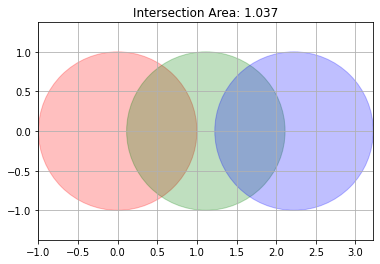

In [5]:
c1 = (0, 0, 1) # x, y, radius
c2 = (1.11287, 0, 1) # x, y, radius
c3 = (2*1.11287, 0, 1) # x, y, radius

plot_circle(c1, 'red', 0.25)
plot_circle(c2, 'green', 0.25)
plot_circle(c3, 'blue', 0.25)
plt.title(f"Intersection Area: {two_circles_intersection_area(c1, c2):0.3f}");
print(two_circles_offset_given_percent_area_overlap(c1, 0.33))

In [13]:
import sympy

# Parameters
pct_overlap = 0.5 # Required overlap
r = 1 # Circle radius

# Intermediate variables
r2 = r * r;
iarea = pct_overlap * math.pi * r2

# Solve numerically
d, theta = sympy.symbols('d, theta')
sympy.nsolve([iarea - r2*(theta-sympy.sin(theta)), 
              d-2*r*sympy.cos(theta/2)], 
             [theta, d], 
             [1, 1])


Matrix([
[ 2.30988146001006],
[0.807945506599034]])

In [14]:
np.cos(3)

-0.9899924966004454